In [14]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [15]:
import numpy as np
import pandas as pd

In [16]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [17]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [18]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [19]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

In [20]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [21]:
# Save references to each table
measurements = Base.classes.measurement
stations = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

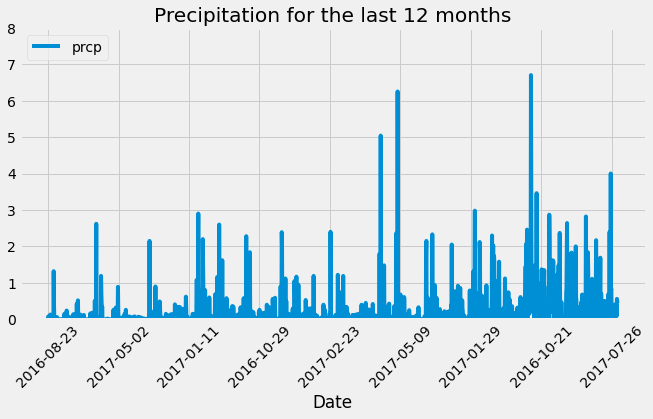

In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
session.query(measurements.date).order_by(measurements.date.desc()).first()
last_year = dt.date(2017,8,23)-dt.timedelta(days=365)
# print("Last year", last_year)

# Perform a query to retrieve the data and precipitation scores
prcp_df = session.query(measurements.date, measurements.prcp).\
    filter(measurements.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(prcp_df, columns=["date","prcp"]).dropna()
prcp_data_df = precipitation_df.set_index('date')

# Sort the dataframe by date
prcp_data_df.sort_values(by='date')
# prcp_data_df = precipitation_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
prcp_data_df.plot(figsize=(10,5),ylim=(0,8))
plt.xlabel('Date')
plt.xticks(rotation=45, horizontalalignment="center")
plt.title('Precipitation for the last 12 months')
plt.savefig('Prcp_Data_Plot.jpg')
plt.legend(loc="upper left")
plt.show()

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df = pd.DataFrame(prcp_df, columns=["date","prcp"]).set_index('date')
precipitation_sum_stats = precipitation_df.groupby(["date"]).agg({'prcp': ['min','max','mean','median','std','sem']})
precipitation_sum_stats

prcp                                           
             min   max      mean median       std       sem
date                                                       
2016-08-23  0.00  1.79  0.451667  0.100  0.706468  0.288414
2016-08-24  0.08  2.28  1.555000  1.800  0.840541  0.343150
2016-08-25  0.00  0.21  0.077143  0.080  0.071813  0.027143
2016-08-26  0.00  0.04  0.016667  0.015  0.016330  0.006667
2016-08-27  0.00  0.18  0.064000  0.020  0.081731  0.036551
...          ...   ...       ...    ...       ...       ...
2017-08-19  0.00  0.09  0.030000  0.000  0.051962  0.030000
2017-08-20  0.00  0.01  0.005000  0.005  0.007071  0.005000
2017-08-21  0.00  0.56  0.193333  0.020  0.317700  0.183424
2017-08-22  0.00  0.50  0.166667  0.000  0.288675  0.166667
2017-08-23  0.00  0.45  0.132500  0.040  0.215000  0.107500

[366 rows x 6 columns]

In [24]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(stations.station)).all()

[(9)]

In [25]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(measurements.station,func.count(measurements.station)).\
group_by(measurements.station).order_by(func.count(measurements.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
USC00519281_df = session.query(measurements.station, measurements.tobs).\
    filter(measurements.station == 'USC00519281').all()
most_active_station = pd.DataFrame(USC00519281_df, columns=["station","temp"]).set_index('station')
# most_active_station.set_index('station')
temp_sum_stats = most_active_station.agg({'temp': ['min','max','mean']})
temp_sum_stats

,temp
min,54.000000
max,85.000000
mean,71.663781


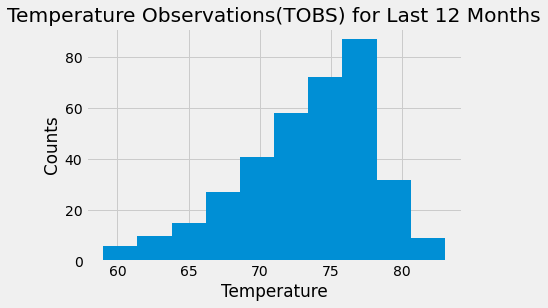

In [37]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highest_act_station = session.query(measurements.station, measurements.tobs, measurements.date).\
    order_by(measurements.date.desc()).\
    filter(measurements.station == 'USC00519281').all()
year_ago = dt.date(2017,8,18)-dt.timedelta(days=365)

tobs_df = session.query(measurements.date, measurements.tobs).\
    filter(measurements.station == 'USC00519281').\
    filter(measurements.date >= year_ago).all()
    
temperature_df = pd.DataFrame(tobs_df, columns=["date","tobs"]).dropna()
temperature_df.set_index('date')
# temperature_df
most_tobs = temperature_df["tobs"]
plt.hist(most_tobs)
plt.title('Temperature Observations(TOBS) for Last 12 Months')
plt.xlabel('Temperature')
plt.ylabel('Counts')
plt.savefig('TOBS_Counts_Histogram.jpg')
plt.show()